In [1]:
import numpy as np
import pandas as pd

In [2]:
raw_data = pd.read_csv("finance_synthetic_data.csv")

"""
This is a sample of 1 row with headers explanation:

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount -
amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.
"""

raw_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
transaction_count = raw_data.groupby(['nameOrig','nameDest']).agg({'amount': ['sum']})
transaction_count

,,amount
,,sum
nameOrig,nameDest,
C1000000639,C785826240,244486.46
C1000001337,M216466820,3170.28
C1000001725,M1974356374,8424.74
C1000002591,C503690069,261877.19
C1000003372,C1840417793,20528.65
...,...,...
C999996999,M1172320911,26585.43
C999998175,C1528914331,37516.21


In [4]:
frauds = raw_data[raw_data["isFraud"] == 1]
frauds

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [5]:
# Prepare Data for Training
# We can drop step, nameOrig, nameDest, isFlaggedFraud since they are not relevant

dropped_data = raw_data.drop(columns=['step','nameOrig','nameDest','isFlaggedFraud'])
dropped_data

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


In [6]:
# Then one-hot encode type

from sklearn.preprocessing import OneHotEncoder, StandardScaler

processed_data = dropped_data.copy()
type_onehot = pd.get_dummies(processed_data['type'])
processed_data = processed_data.drop(columns='type')
processed_data = pd.concat([processed_data, type_onehot], axis=1)
processed_data

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,1,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,1,0
2,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0,1
3,181.00,181.00,0.00,21182.00,0.00,1,0,1,0,0,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,0,1,0,0,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,0,1
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,1,0,0,0
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,0,1


In [7]:
# Normalise numerical values
processed_data2 = processed_data.copy()
# = processed_data2["amount", "oldbalanceOrg", "newbalanceOrg", "oldbalanceDest", "newbalanceDest"].values
data_to_normalise = processed_data2[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]]
remaining_data = processed_data2.drop(columns = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"])

scaler = StandardScaler()
scaled_values = scaler.fit_transform(data_to_normalise.values) 
scaled_values = pd.DataFrame(scaled_values)
processed_data2 = pd.concat([remaining_data, scaled_values], axis=1)

processed_data2

,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,0,1,2,3,4
0,0,0,0,0,1,0,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411
1,0,0,0,0,1,0,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411
2,1,0,0,0,0,1,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411
3,1,0,1,0,0,0,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411
4,0,0,0,0,1,0,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411
...,...,...,...,...,...,...,...,...,...,...,...
6362615,1,0,1,0,0,0,0.264665,-0.171108,-0.292442,-0.323814,-0.240959
6362616,1,0,0,0,0,1,10.153953,1.896491,-0.292442,-0.323814,-0.333411
6362617,1,0,1,0,0,0,10.153953,1.896491,-0.292442,-0.303665,1.403027
6362618,1,0,0,0,0,1,1.109765,0.005581,-0.292442,-0.323814,-0.333411


In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.utils import resample

y = processed_data2["isFraud"].to_numpy()
x = processed_data2.drop(columns="isFraud").to_numpy()
splits = StratifiedKFold(n_splits=5).split(x,y)
results = []

for train_index, test_index in StratifiedKFold(n_splits=5).split(x, y):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    fraudarray = []
    nofraudarray = []

    for output in y_train:
        if output == 1:
            fraudarray.append(True)
            nofraudarray.append(False)
        else:
            fraudarray.append(False)
            nofraudarray.append(True)

    xtrain_fraud = X_train[fraudarray]
    ytrain_fraud = y_train[fraudarray]
    xtrain_nofraud = X_train[nofraudarray]
    ytrain_nofraud = y_train[nofraudarray]

    up_xtrain_fraud, up_ytrain_fraud = xtrain_fraud, ytrain_fraud
    # down_xtrain_nofraud, down_ytrain_nofraud = xtrain_nofraud, ytrain_nofraud

    """
    up_xtrain_fraud, up_ytrain_fraud = resample(xtrain_fraud,
                                    ytrain_fraud,
                                    replace=True,     # sample with replacement
                                    n_samples=500000,    # to match majority class
                                    random_state=1) # reproducible results

    """
    down_xtrain_nofraud, down_ytrain_nofraud = resample(xtrain_nofraud,
                                    ytrain_nofraud,
                                    replace=False,     # sample with replacement
                                    n_samples=500000,    # to match majority class
                                    random_state=1) # reproducible results


    xtrainfinal = np.concatenate((up_xtrain_fraud,down_xtrain_nofraud))
    ytrainfinal = np.concatenate((up_ytrain_fraud,down_ytrain_nofraud))

    model = MLPClassifier(hidden_layer_sizes=125,random_state=1, max_iter=300).fit(xtrainfinal, ytrainfinal)
    print("Epoch Complete")
    y_pred = model.predict(X_test)
    results.append([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), roc_auc_score(y_test, y_pred)])




Epoch Complete
Epoch Complete
Epoch Complete
Epoch Complete
Epoch Complete


In [9]:
result_array = np.array(results).T
final_results = []

for row in result_array:
    final_results.append(np.mean(row))

# Accuracy, Recall, Precision, F1, AUC
final_results

[0.9992572242252405,
 0.7819238299566388,
 0.7139747150291914,
 0.8907309728656969]

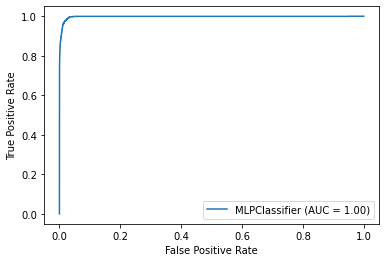

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
# Accuracy, Recall, Precision, F1, AUC
plot_roc_curve(model, X_test, y_test)
plt.show()

In [10]:
import pickle

with open('model.pkl','wb') as f:
    pickle.dump(model,f)

"""
# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)
"""

"\n# load\nwith open('model.pkl', 'rb') as f:\n    clf2 = pickle.load(f)\n"

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.utils import resample

y = processed_data2["isFraud"].to_numpy()
x = processed_data2.drop(columns="isFraud").to_numpy()
splits = StratifiedKFold(n_splits=5).split(x,y)
results2 = []

for train_index, test_index in StratifiedKFold(n_splits=5).split(x, y):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    fraudarray = []
    nofraudarray = []

    for output in y_train:
        if output == 1:
            fraudarray.append(True)
            nofraudarray.append(False)
        else:
            fraudarray.append(False)
            nofraudarray.append(True)

    xtrain_fraud = X_train[fraudarray]
    ytrain_fraud = y_train[fraudarray]
    xtrain_nofraud = X_train[nofraudarray]
    ytrain_nofraud = y_train[nofraudarray]

    up_xtrain_fraud, up_ytrain_fraud = xtrain_fraud, ytrain_fraud
    # down_xtrain_nofraud, down_ytrain_nofraud = xtrain_nofraud, ytrain_nofraud

    """
    up_xtrain_fraud, up_ytrain_fraud = resample(xtrain_fraud,
                                    ytrain_fraud,
                                    replace=True,     # sample with replacement
                                    n_samples=500000,    # to match majority class
                                    random_state=1) # reproducible results

    """
    down_xtrain_nofraud, down_ytrain_nofraud = resample(xtrain_nofraud,
                                    ytrain_nofraud,
                                    replace=False,     # sample with replacement
                                    n_samples=500000,    # to match majority class
                                    random_state=1) # reproducible results


    xtrainfinal = np.concatenate((up_xtrain_fraud,down_xtrain_nofraud))
    ytrainfinal = np.concatenate((up_ytrain_fraud,down_ytrain_nofraud))

    clf= LogisticRegression(random_state=0,max_iter=300).fit(xtrainfinal,ytrainfinal)
    logiPred=clf.predict(X_test)
    results2.append([accuracy_score(y_test, logiPred), recall_score(y_test, logiPred), precision_score(y_test, logiPred), roc_auc_score(y_test, logiPred)])




In [22]:
result_array = np.array(results2).T
final_results = []

for row in result_array:
    final_results.append(np.mean(row))

# Accuracy, Recall, Precision, F1, AUC
final_results

[0.9988614753041987,
 0.5203917553745525,
 0.6090259968036997,
 0.7599358220018985]

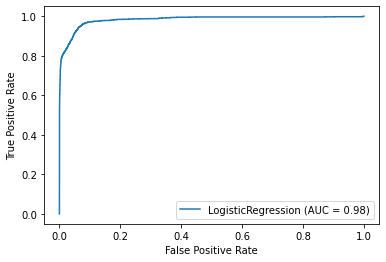

In [25]:
# Accuracy, Recall, Precision, F1, AUC
plot_roc_curve(clf, X_test, y_test)
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.utils import resample

y = processed_data2["isFraud"].to_numpy()
x = processed_data2.drop(columns="isFraud").to_numpy()
splits = StratifiedKFold(n_splits=5).split(x,y)
results3 = []

for train_index, test_index in StratifiedKFold(n_splits=5).split(x, y):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    fraudarray = []
    nofraudarray = []

    for output in y_train:
        if output == 1:
            fraudarray.append(True)
            nofraudarray.append(False)
        else:
            fraudarray.append(False)
            nofraudarray.append(True)

    xtrain_fraud = X_train[fraudarray]
    ytrain_fraud = y_train[fraudarray]
    xtrain_nofraud = X_train[nofraudarray]
    ytrain_nofraud = y_train[nofraudarray]

    up_xtrain_fraud, up_ytrain_fraud = xtrain_fraud, ytrain_fraud
    # down_xtrain_nofraud, down_ytrain_nofraud = xtrain_nofraud, ytrain_nofraud

    """
    up_xtrain_fraud, up_ytrain_fraud = resample(xtrain_fraud,
                                    ytrain_fraud,
                                    replace=True,     # sample with replacement
                                    n_samples=500000,    # to match majority class
                                    random_state=1) # reproducible results

    """
    down_xtrain_nofraud, down_ytrain_nofraud = resample(xtrain_nofraud,
                                    ytrain_nofraud,
                                    replace=False,     # sample with replacement
                                    n_samples=500000,    # to match majority class
                                    random_state=1) # reproducible results


    xtrainfinal = np.concatenate((up_xtrain_fraud,down_xtrain_nofraud))
    ytrainfinal = np.concatenate((up_ytrain_fraud,down_ytrain_nofraud))

    forest= RandomForestClassifier(criterion="gini",random_state=0,max_depth=10)
    forest.fit(xtrainfinal,ytrainfinal)
    forest_pred=forest.predict(X_test)
    results3.append([accuracy_score(y_test, forest_pred), recall_score(y_test, forest_pred), precision_score(y_test, forest_pred), roc_auc_score(y_test, forest_pred)])



In [21]:
result_array = np.array(results3).T
final_results = []

for row in result_array:
    final_results.append(np.mean(row))

# Accuracy, Recall, Precision, F1, AUC
final_results

[0.9995839764122326, 0.7681691715416157, 0.89815645251199, 0.8840261224198598]

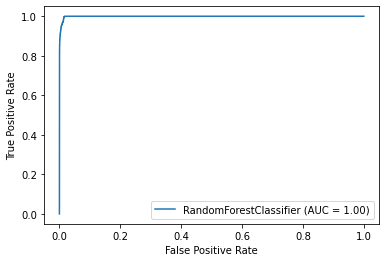

In [26]:
plot_roc_curve(forest, X_test, y_test)
plt.show()